# **Methodology**

## **1. Data Preparation**

### **Problem Statement**

Analisis Kepribadian Pelanggan adalah analisis terperinci tentang pelanggan ideal perusahaan. Ini membantu bisnis untuk lebih memahami pelanggannya dan memudahkan mereka untuk memodifikasi produk sesuai dengan kebutuhan, perilaku, dan perhatian khusus dari berbagai jenis pelanggan.

Analisis kepribadian pelanggan membantu bisnis untuk memodifikasi produknya berdasarkan target pelanggan dari berbagai jenis segmen pelanggan. Misalnya, alih-alih mengeluarkan uang untuk memasarkan produk baru ke setiap pelanggan di database perusahaan, perusahaan dapat menganalisis segmen pelanggan mana yang paling mungkin membeli produk dan kemudian memasarkan produk hanya pada segmen tertentu.

### **Objectives**

Segmentasi berbasis nilai mengevaluasi kelompok pelanggan dalam hal pendapatan yang mereka hasilkan dan biaya untuk membangun dan memelihara hubungan dengan mereka. Ini juga membantu perusahaan menentukan segmen mana yang paling dan paling tidak menguntungkan sehingga mereka dapat menyesuaikan anggaran pemasaran mereka.

Segmentasi berbasis nilai membantu mengidentifikasi pelanggan yang Memerlukan lebih banyak perhatian dari tim penjualan dan layanan.

### **Analytical Approach**

### **Definisi Kolom**

| **Nama Kolom** | **Keterangan Kolom** |
| --- | --- |
|**PEOPLE**||
|ID| Customer's unique identifier|
|Year_Birth| Customer's birth year|
|Education| Customer's education level|
|Marital_Status| Customer's marital status|
|Income| Customer's yearly household income|
|Kidhome| Number of children in customer's household|
|Teenhome| Number of teenagers in customer's household|
|Dt_Customer| Date of customer's enrollment with the company|
|Recency| Number of days since customer's last purchase|
|Complain| 1 if customer complained in the last 2 years, 0 otherwise|
|**PRODUCT**||
|MntWines| Amount spent on wine in last 2 years|
|MntFruits| Amount spent on fruits in last 2 years|
|MntMeatProducts| Amount spent on meat in last 2 years|
|MntFishProducts| Amount spent on fish in last 2 years|
|MntSweetProducts| Amount spent on sweets in last 2 years|
|MntGoldProds| Amount spent on gold in last 2 years|
|**PROMOTION**||
|NumDealsPurchases| Number of purchases made with a discount
|AcceptedCmp1| 1 if customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2| 1 if customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3| 1 if customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4| 1 if customer accepted the offer in the 4th campaign, 0 otherwise|
|AcceptedCmp5| 1 if customer accepted the offer in the 5th campaign, 0 otherwise|
|Response | 1 if customer accepted the offer in the last campaign, 0 otherwise|
|**PLACE**||
|NumWebPurchases| Number of purchases made through the company’s web site|
|NumCatalogPurchases| Number of purchases made using a catalogue|
|NumStorePurchases| Number of purchases made directly in stores|
|NumWebVisitsMonth| Number of visits to company’s web site in the last month|

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
main_data = pd.read_csv('https://raw.githubusercontent.com/mhdalfarisy/Customer-Segmentation-Wine-Store/main/marketing_campaign_clustering.csv', sep='\t')
df = main_data.copy()
pd.options.display.max_columns=100
pd.options.display.max_rows=1500000
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## **2. DATA WRANGLING**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df['Income'].fillna(df['Income'].max(),inplace=True)

In [6]:
df['Age'] = 2022 - df['Year_Birth']

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41


In [8]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [9]:
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

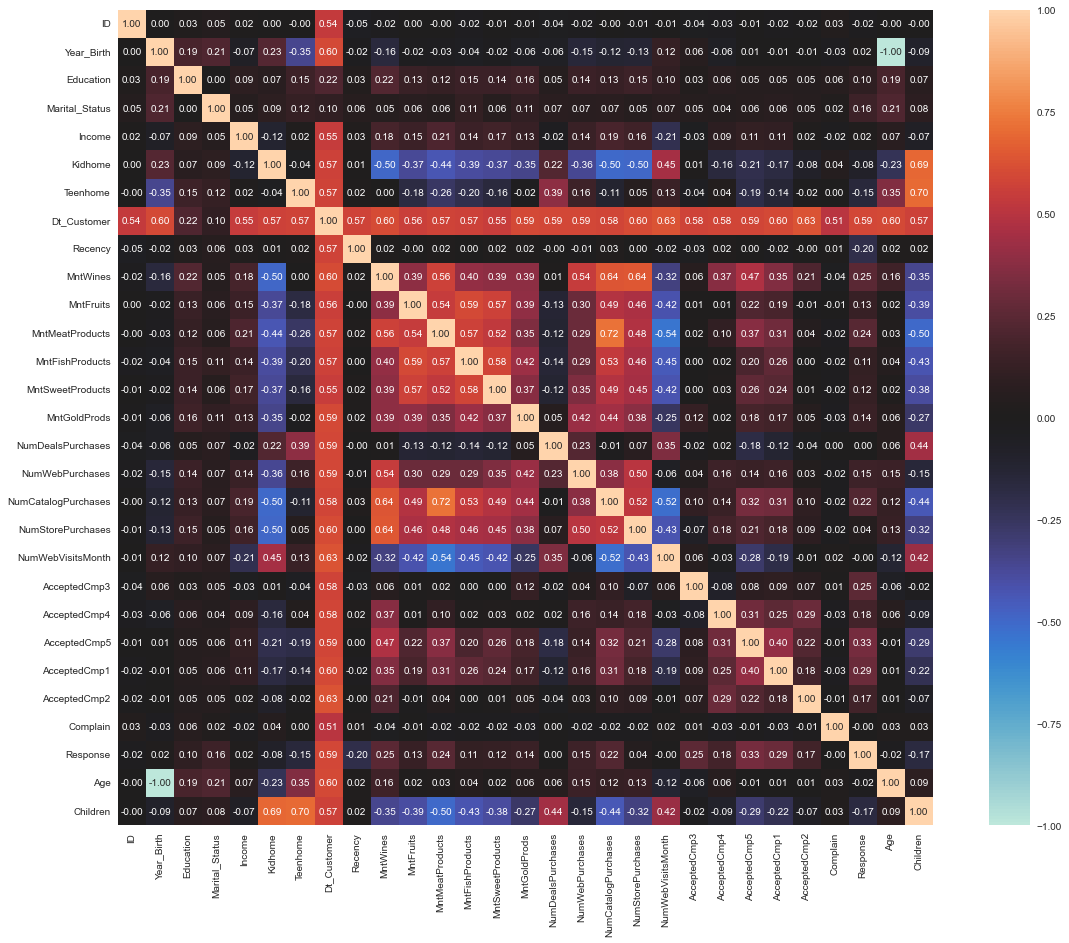

In [10]:
from dython import nominal
nominal.associations(df,figsize=(20,15),mark_columns=False)
plt.show()

In [11]:
df.drop(columns=['ID','Year_Birth','Kidhome','Teenhome','Dt_Customer','Recency'],inplace=True)

In [12]:
df_o = df.copy()

In [13]:
df_o.describe(include='all')

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
count,2240,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1127,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,58830.309375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,53.194196,0.950446
std,NaN,NaN,68044.809139,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,0.751803
min,NaN,NaN,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
25%,NaN,NaN,35538.750000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,NaN,NaN,51741.500000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,1.000000
75%,NaN,NaN,69116.500000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.000000


#### CEK OUTLIER

In [14]:
def check_outliers(df,col):
    Q1=df_o[col].describe()['25%']
    Q3=df_o[col].describe()['75%']
    IQR=Q3-Q1
    Upper_fence=Q3+(1.5*IQR)
    Lower_fence=Q1-(1.5*IQR)
    df_outliers=df_o[(df_o[col]<Lower_fence) | (df_o[col]>Upper_fence)]
    if len(df_outliers)==0:
        return 'Tidak Ada Outliers'
    else:
        return df_outliers

##### Income

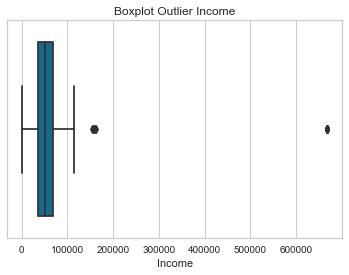

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
10,Graduation,Married,666666.0,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,39,1
27,Graduation,Single,666666.0,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,36,1
43,PhD,Single,666666.0,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0,63,0
48,Graduation,Single,666666.0,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0,71,3
58,Graduation,Single,666666.0,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0,40,1


In [15]:
sns.boxplot(df_o['Income'])
plt.title('Boxplot Outlier Income')
plt.show()
outliers_Income=check_outliers(df_o,'Income')
outliers_Income.head()

In [16]:
print(f'Total outlier pada kolom Income : {outliers_Income.shape[0]}')
print(f'Total data awal: {df_o.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_Income.shape[0]/df_o.shape[0])*100}')

Total outlier pada kolom Income : 32
Total data awal: 2240
Persentase total outlier dari total data (%): 1.4285714285714286


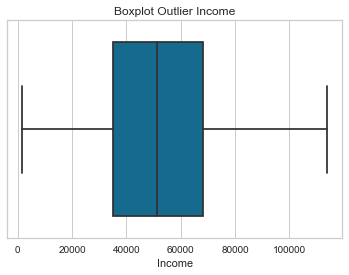

In [17]:
df_o.drop(outliers_Income.index,inplace=True)
sns.boxplot(df_o['Income'])
plt.title('Boxplot Outlier Income')
plt.show()

##### MntWines

In [18]:
df_o['MntWines'].describe()

count    2208.000000
mean      306.100996
std       337.516270
min         0.000000
25%        24.000000
50%       177.500000
75%       507.000000
max      1493.000000
Name: MntWines, dtype: float64

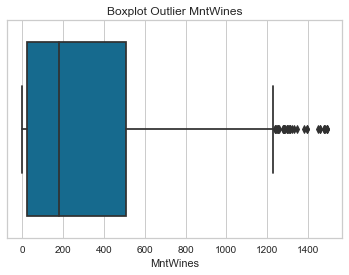

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
111,PhD,Single,68126.0,1332,17,311,23,51,86,1,7,4,5,9,0,1,0,0,0,0,1,31,0
161,PhD,Married,70356.0,1349,16,249,43,16,33,2,10,6,9,6,0,0,0,0,0,0,0,77,0
295,Master,Together,55951.0,1241,0,80,0,13,40,3,3,6,11,8,0,1,0,0,1,0,0,70,1
424,PhD,Married,93027.0,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,0,81,0
430,PhD,Single,84865.0,1248,16,349,43,16,16,1,2,4,9,4,0,1,1,1,1,0,1,61,0


In [19]:
sns.boxplot(df_o['MntWines'])
plt.title('Boxplot Outlier MntWines')
plt.show()
outliers_MntWines=check_outliers(df_o,'MntWines')
outliers_MntWines.head()

In [20]:
print(f'Total outlier pada kolom MntWines : {outliers_MntWines.shape[0]}')
print(f'Total data awal: {df_o.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_MntWines.shape[0]/df_o.shape[0])*100}')

Total outlier pada kolom MntWines : 34
Total data awal: 2208
Persentase total outlier dari total data (%): 1.5398550724637683


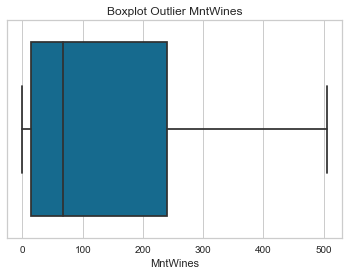

In [21]:
df_o.drop(df_o[(df_o['MntWines']>=507.000000)].index,inplace=True)
sns.boxplot(df_o['MntWines'])
plt.title('Boxplot Outlier MntWines')
plt.show()

##### MntFruits

In [22]:
df_o['MntFruits'].describe()

count    1655.000000
mean       19.424773
std        35.193440
min         0.000000
25%         1.000000
50%         5.000000
75%        19.000000
max       199.000000
Name: MntFruits, dtype: float64

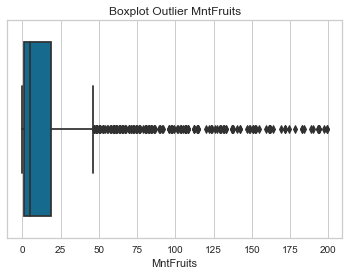

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
2,Graduation,Together,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,0
6,Graduation,Divorced,55635.0,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,51,1
12,Graduation,Divorced,63033.0,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,0,63,0
40,Graduation,Married,80011.0,421,76,536,82,178,102,2,8,6,5,4,0,0,0,0,0,0,0,42,1
45,Graduation,Single,79941.0,123,164,266,227,30,174,1,2,4,9,1,0,0,0,0,0,0,0,46,0


In [23]:
sns.boxplot(df_o['MntFruits'])
plt.title('Boxplot Outlier MntFruits')
plt.show()
outliers_MntFruits=check_outliers(df_o,'MntFruits')
outliers_MntFruits.head()

In [24]:
print(f'Total outlier pada kolom MntFruits : {outliers_MntFruits.shape[0]}')
print(f'Total data awal: {df_o.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_MntFruits.shape[0]/df_o.shape[0])*100}')

Total outlier pada kolom MntFruits : 211
Total data awal: 1655
Persentase total outlier dari total data (%): 12.749244712990937


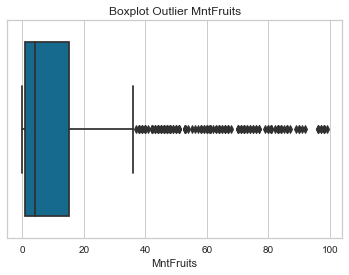

In [25]:
df_o.drop(df_o[(df_o['MntFruits']>=100.000000)].index,inplace=True)
sns.boxplot(df_o['MntFruits'])
plt.title('Boxplot Outlier MntFruits')
plt.show()

##### MntMeatProducts

In [26]:
df_o['MntMeatProducts'].describe()

count    1568.000000
mean       89.773597
std       154.553020
min         0.000000
25%        11.000000
50%        27.000000
75%        92.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64

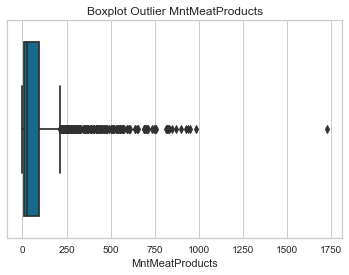

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
12,Graduation,Divorced,63033.0,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,0,63,0
21,Graduation,Married,2447.0,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,0,43,1
34,Master,Married,68657.0,482,34,471,119,68,22,1,3,5,9,7,0,0,0,0,0,0,0,76,0
40,Graduation,Married,80011.0,421,76,536,82,178,102,2,8,6,5,4,0,0,0,0,0,0,0,42,1
56,Graduation,Divorced,70287.0,295,35,482,121,120,40,1,5,5,10,3,0,0,0,0,0,0,1,56,0


In [27]:
sns.boxplot(df_o['MntMeatProducts'])
plt.title('Boxplot Outlier MntMeatProducts')
plt.show()
outliers_MntMeatProducts=check_outliers(df_o,'MntMeatProducts')
outliers_MntMeatProducts.head()

In [28]:
print(f'Total outlier pada kolom MntMeatProducts : {outliers_MntMeatProducts.shape[0]}')
print(f'Total data awal: {df_o.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_MntMeatProducts.shape[0]/df_o.shape[0])*100}')

Total outlier pada kolom MntMeatProducts : 190
Total data awal: 1568
Persentase total outlier dari total data (%): 12.11734693877551


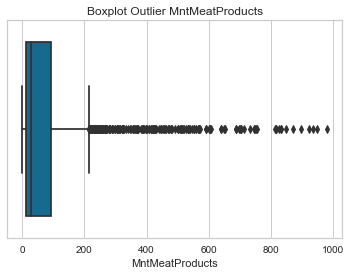

In [29]:
df_o.drop(df_o[(df_o['MntMeatProducts']>=1725.000000)].index,inplace=True)
sns.boxplot(df_o['MntMeatProducts'])
plt.title('Boxplot Outlier MntMeatProducts')
plt.show()

##### MntFishProducts

In [30]:
df_o['MntFishProducts'].describe()

count    1567.000000
mean       23.691130
std        42.122249
min         0.000000
25%         2.000000
50%         7.000000
75%        21.000000
max       258.000000
Name: MntFishProducts, dtype: float64

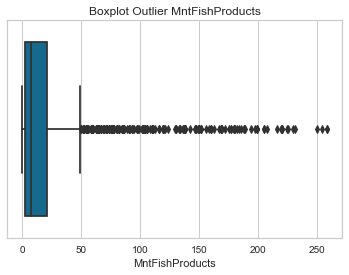

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
2,Graduation,Together,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,0
6,Graduation,Divorced,55635.0,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,51,1
12,Graduation,Divorced,63033.0,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,0,63,0
17,Graduation,Together,37760.0,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,0,76,0
20,Graduation,Married,37040.0,86,2,73,69,38,48,1,4,2,5,8,0,0,0,0,0,0,0,40,0


In [31]:
sns.boxplot(df_o['MntFishProducts'])
plt.title('Boxplot Outlier MntFishProducts')
plt.show()
outliers_MntFishProducts=check_outliers(df_o,'MntFishProducts')
outliers_MntFishProducts.head()

In [32]:
print(f'Total outlier pada kolom MntFishProducts : {outliers_MntFishProducts.shape[0]}')
print(f'Total data awal: {df_o.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_MntFishProducts.shape[0]/df_o.shape[0])*100}')

Total outlier pada kolom MntFishProducts : 229
Total data awal: 1567
Persentase total outlier dari total data (%): 14.613911933631144


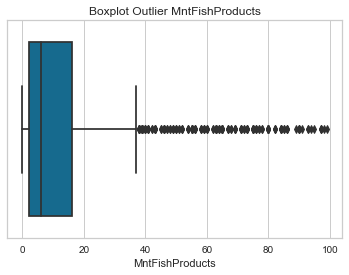

In [33]:
df_o.drop(df_o[(df_o['MntFishProducts']>=100.000000)].index,inplace=True)
sns.boxplot(df_o['MntFishProducts'])
plt.title('Boxplot Outlier MntFishProducts')
plt.show()

##### MntSweetProducts

In [34]:
df_o['MntSweetProducts'].describe()

count    1456.000000
mean       12.344093
std        25.126903
min         0.000000
25%         1.000000
50%         4.000000
75%        12.000000
max       262.000000
Name: MntSweetProducts, dtype: float64

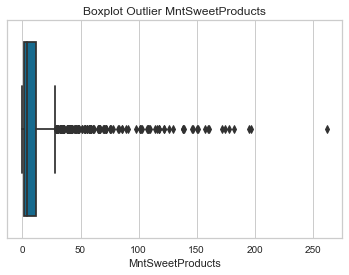

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
6,Graduation,Divorced,55635.0,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,51,1
20,Graduation,Married,37040.0,86,2,73,69,38,48,1,4,2,5,8,0,0,0,0,0,0,0,40,0
23,PhD,Married,65324.0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,68,1
40,Graduation,Married,80011.0,421,76,536,82,178,102,2,8,6,5,4,0,0,0,0,0,0,0,42,1
50,Graduation,Widow,65486.0,245,19,125,37,67,14,1,4,2,10,2,0,0,0,0,0,0,0,65,1


In [35]:
sns.boxplot(df_o['MntSweetProducts'])
plt.title('Boxplot Outlier MntSweetProducts')
plt.show()
outliers_MntSweetProducts=check_outliers(df_o,'MntSweetProducts')
outliers_MntSweetProducts.head()

In [36]:
print(f'Total outlier pada kolom MntSweetProducts : {outliers_MntSweetProducts.shape[0]}')
print(f'Total data awal: {df_o.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_MntSweetProducts.shape[0]/df_o.shape[0])*100}')

Total outlier pada kolom MntSweetProducts : 155
Total data awal: 1456
Persentase total outlier dari total data (%): 10.645604395604396


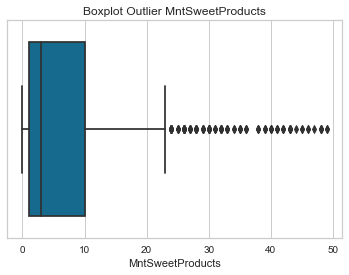

In [37]:
df_o.drop(df_o[(df_o['MntSweetProducts']>=51.000000)].index,inplace=True)
sns.boxplot(df_o['MntSweetProducts'])
plt.title('Boxplot Outlier MntSweetProducts')
plt.show()

##### MntGoldProds

In [38]:
df_o['MntGoldProds'].describe()

count    1374.000000
mean       26.451237
std        37.626584
min         0.000000
25%         5.000000
50%        13.000000
75%        30.000000
max       321.000000
Name: MntGoldProds, dtype: float64

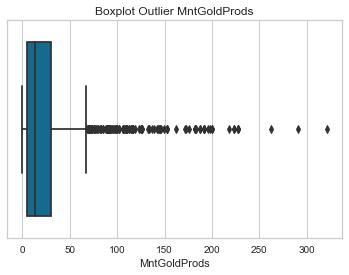

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
24,Graduation,Together,40689.0,270,3,27,39,6,99,7,7,1,5,8,0,0,0,0,0,0,0,71,1
31,Master,Together,38620.0,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,0,59,0
54,Graduation,Married,66373.0,328,9,124,12,24,109,7,4,2,10,3,0,0,0,0,0,0,0,44,2
83,Master,Together,38620.0,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,0,59,0
96,Graduation,Widow,47916.0,505,0,26,0,0,75,5,7,4,6,6,0,1,0,0,0,0,0,62,1


In [39]:
sns.boxplot(df_o['MntGoldProds'])
plt.title('Boxplot Outlier MntGoldProds')
plt.show()
outliers_MntGoldProds=check_outliers(df_o,'MntGoldProds')
outliers_MntGoldProds.head()

In [40]:
print(f'Total outlier pada kolom MntGoldProds : {outliers_MntGoldProds.shape[0]}')
print(f'Total data awal: {df_o.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_MntGoldProds.shape[0]/df_o.shape[0])*100}')

Total outlier pada kolom MntGoldProds : 129
Total data awal: 1374
Persentase total outlier dari total data (%): 9.388646288209607


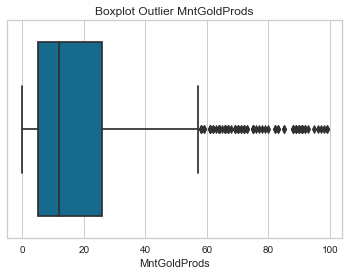

In [41]:
df_o.drop(df_o[(df_o['MntGoldProds']>=100.000000)].index,inplace=True)
sns.boxplot(df_o['MntGoldProds'])
plt.title('Boxplot Outlier MntGoldProds')
plt.show()

##### NumDealsPurchases

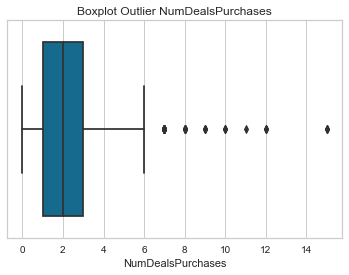

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
24,Graduation,Together,40689.0,270,3,27,39,6,99,7,7,1,5,8,0,0,0,0,0,0,0,71,1
148,2n Cycle,Married,35688.0,73,3,90,12,1,32,7,4,1,4,8,0,0,0,0,0,0,0,49,3
212,PhD,Married,44377.0,224,0,30,0,0,10,8,5,1,5,8,0,0,0,0,0,0,0,54,2
213,Master,Together,46014.0,410,0,59,19,9,44,10,7,1,8,7,0,0,0,0,0,0,0,48,2
230,Graduation,Single,37070.0,231,7,137,4,15,39,9,5,1,8,7,0,0,0,0,0,0,1,56,2


In [42]:
sns.boxplot(df_o['NumDealsPurchases'])
plt.title('Boxplot Outlier NumDealsPurchases')
plt.show()
outliers_NumDealsPurchases=check_outliers(df_o,'NumDealsPurchases')
outliers_NumDealsPurchases.head()

In [43]:
print(f'Total outlier pada kolom NumDealsPurchases : {outliers_NumDealsPurchases.shape[0]}')
print(f'Total data awal: {df_o.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_NumDealsPurchases.shape[0]/df_o.shape[0])*100}')

Total outlier pada kolom NumDealsPurchases : 44
Total data awal: 1299
Persentase total outlier dari total data (%): 3.387220939183987


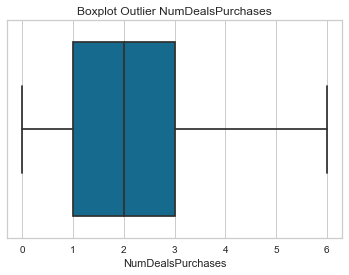

In [44]:
df_o.drop(outliers_NumDealsPurchases.index,inplace=True)
sns.boxplot(df_o['NumDealsPurchases'])
plt.title('Boxplot Outlier NumDealsPurchases')
plt.show()

##### NumWebPurchases

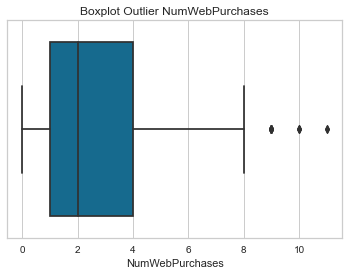

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
437,Master,Widow,51529.0,400,4,35,6,0,22,2,9,1,5,8,0,0,0,0,0,0,0,73,1
494,PhD,Divorced,55614.0,504,13,131,8,0,26,1,9,4,6,7,0,1,0,0,0,0,0,78,0
700,Graduation,Divorced,78901.0,321,11,309,33,26,34,3,9,3,5,4,0,0,0,0,0,0,0,49,1
796,PhD,Married,70421.0,479,28,136,75,14,35,3,10,3,7,6,0,0,0,0,0,0,0,68,1
992,Master,Together,42021.0,393,5,136,7,5,27,5,10,1,6,9,1,0,0,0,0,0,0,41,1


In [45]:
sns.boxplot(df_o['NumWebPurchases'])
plt.title('Boxplot Outlier NumWebPurchases')
plt.show()
outliers_NumWebPurchases=check_outliers(df_o,'NumWebPurchases')
outliers_NumWebPurchases.head()

In [46]:
print(f'Total outlier pada kolom NumWebPurchases : {outliers_NumWebPurchases.shape[0]}')
print(f'Total data awal: {df_o.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_NumWebPurchases.shape[0]/df_o.shape[0])*100}')

Total outlier pada kolom NumWebPurchases : 16
Total data awal: 1255
Persentase total outlier dari total data (%): 1.2749003984063745


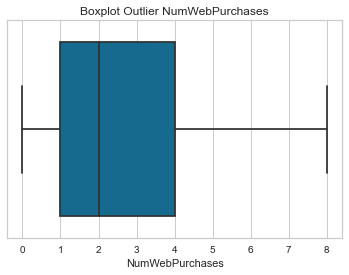

In [47]:
df_o.drop(outliers_NumWebPurchases.index,inplace=True)
sns.boxplot(df_o['NumWebPurchases'])
plt.title('Boxplot Outlier NumWebPurchases')
plt.show()

## **3. DATA ANALYST**

In [48]:
total_o = float(len(df_o))

### **PEOPLE**

#### Education

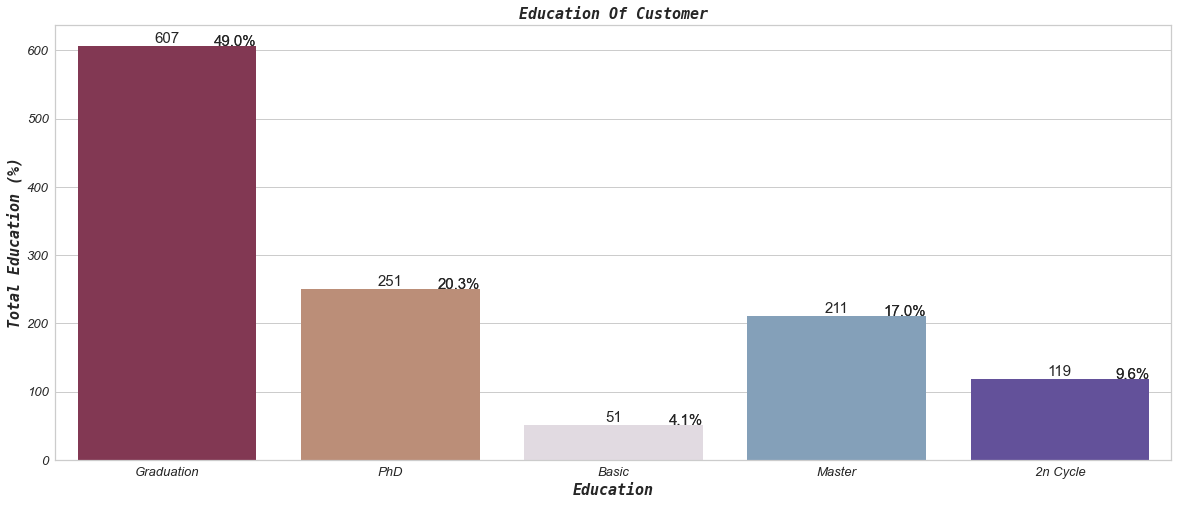

In [49]:
f, axs = plt.subplots(1,1,figsize=(20,8), sharex=True)
ax = sns.countplot(x='Education', data=df_o, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
for container in ax.containers:
    ax.bar_label(container,size=15, horizontalalignment='right')
ab = sns.countplot(x="Education",data=df_o,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_o)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ab.annotate(percentage, (x, y),size=15,ha='right')
    plt.xticks(size=13,fontstyle='italic')
    plt.yticks(size=13,fontstyle='italic')
    plt.title('Education Of Customer',size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Education',size=15, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Education (%)', size=15, fontstyle='italic',family='monospace', weight=900)
plt.show()

#### Marital

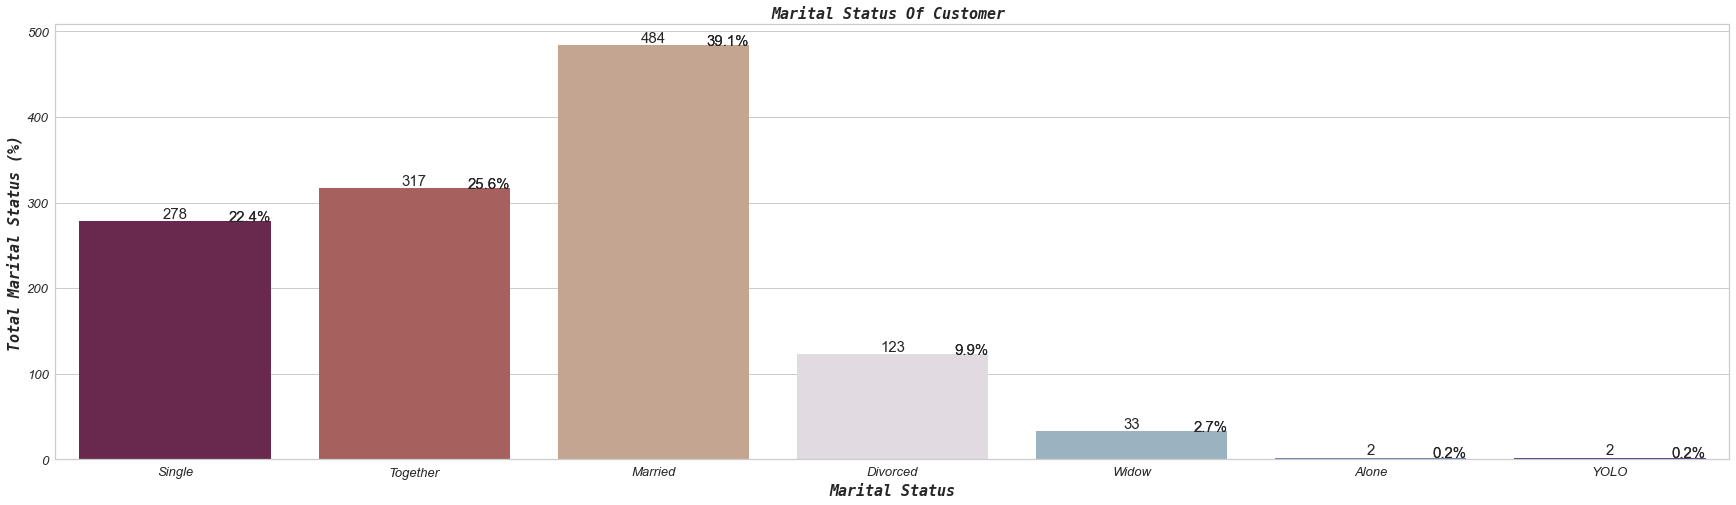

In [50]:
f, axs = plt.subplots(1,1,figsize=(30,8), sharex=True)
ax = sns.countplot(x='Marital_Status', data=df_o, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
for container in ax.containers:
    ax.bar_label(container,size=15, horizontalalignment='right')
ab = sns.countplot(x="Marital_Status",data=df_o,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_o)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ab.annotate(percentage, (x, y),size=15,ha='right')
    plt.xticks(size=13,fontstyle='italic')
    plt.yticks(size=13,fontstyle='italic')
    plt.title('Marital Status Of Customer ',size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Marital Status',size=15, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Marital Status (%)', size=15, fontstyle='italic',family='monospace', weight=900)
plt.show()

#### Income

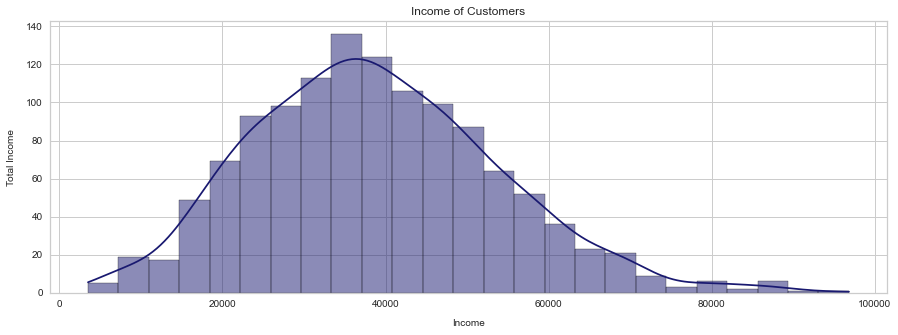

In [51]:
plt.subplots(1,1,figsize=(15,5), sharex=True)
ax = sns.histplot(data = df_o['Income'], color = "midnightblue",kde=True)
ax.set(title = "Income of Customers");
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Income', fontsize=10, labelpad=10)
plt.ylabel('Total Income', fontsize=10, labelpad=10);

In [52]:
df.head(2)

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
0,Graduation,Single,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0
1,Graduation,Single,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,2


#### Complain

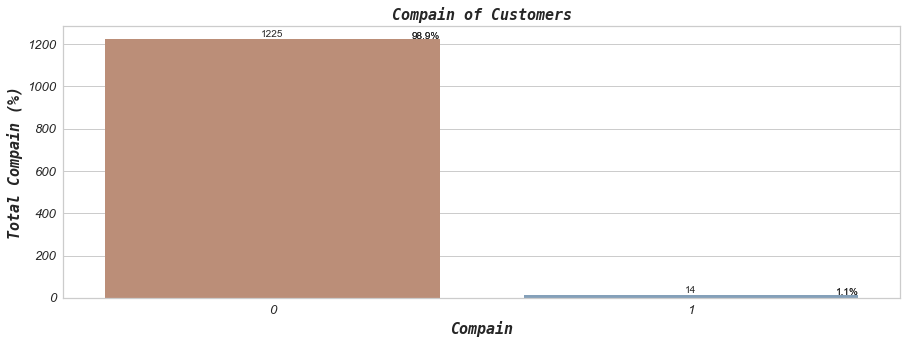

In [53]:
f, axs = plt.subplots(1,1,figsize=(15,5), sharex=True)
ax = sns.countplot(x='Complain', data=df_o, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='right')
ab = sns.countplot(x="Complain",data=df_o,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_o)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ab.annotate(percentage, (x, y),size=10,ha='right')
    plt.xticks(size=13,fontstyle='italic')
    plt.yticks(size=13,fontstyle='italic')
    plt.title('Compain of Customers',size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Compain',size=15, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Compain (%)', size=15, fontstyle='italic',family='monospace', weight=900)
plt.show()

#### Age

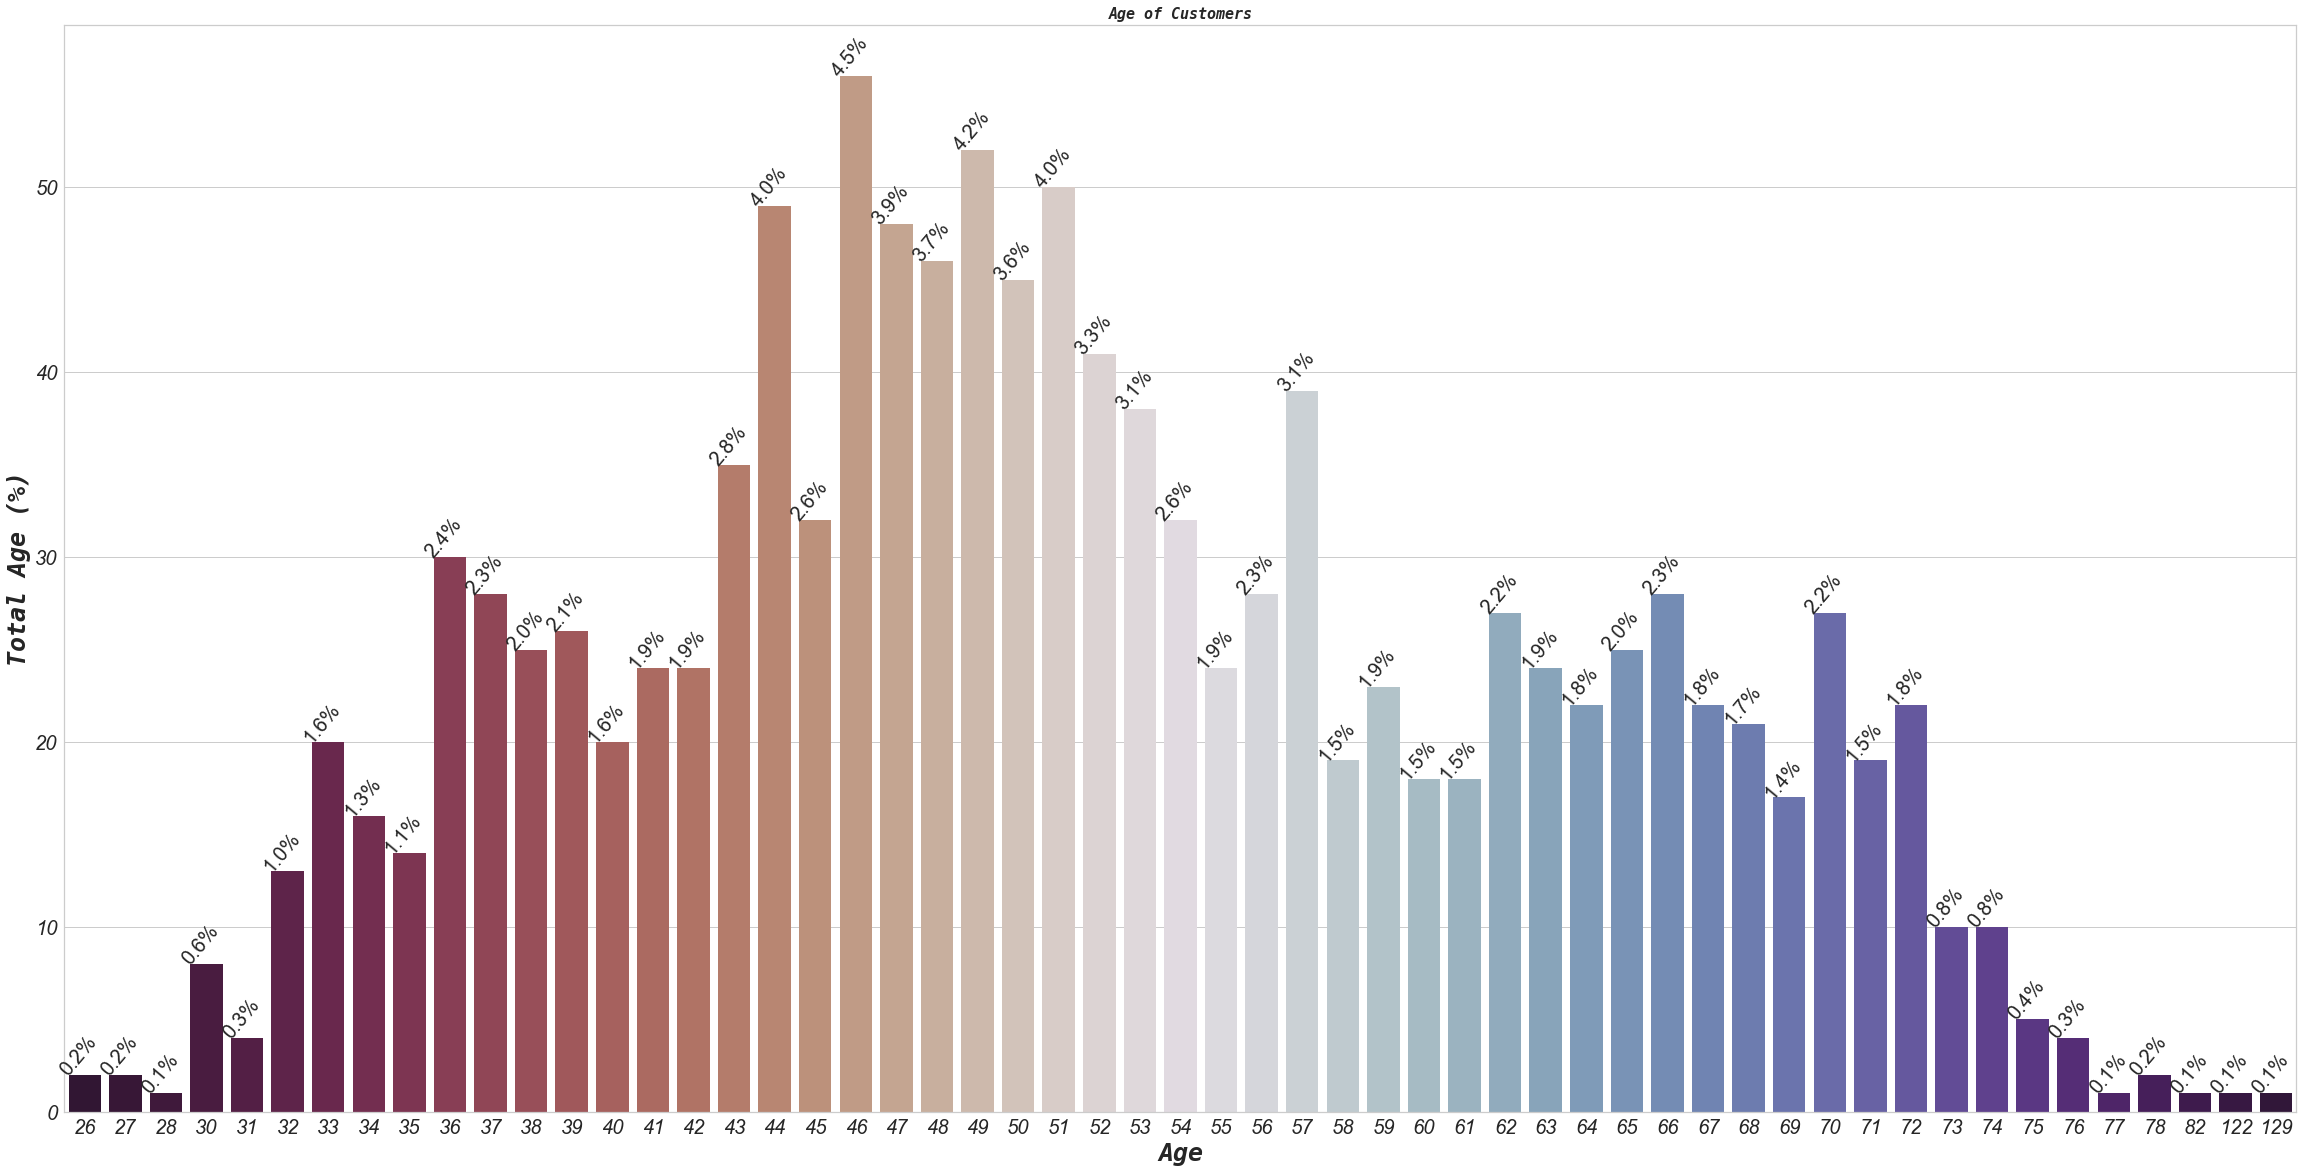

In [54]:
f, axs = plt.subplots(1,1,figsize=(40,20), sharex=True)
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
ab = sns.countplot(x="Age",data=df_o,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_o)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ab.annotate(percentage, (x, y),size=20,ha='right',rotation=50)
    plt.xticks(size=20,fontstyle='italic')
    plt.yticks(size=20,fontstyle='italic')
    plt.title('Age of Customers',size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Age',size=25, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Age (%)', size=25, fontstyle='italic',family='monospace', weight=900)
plt.show()

#### Children

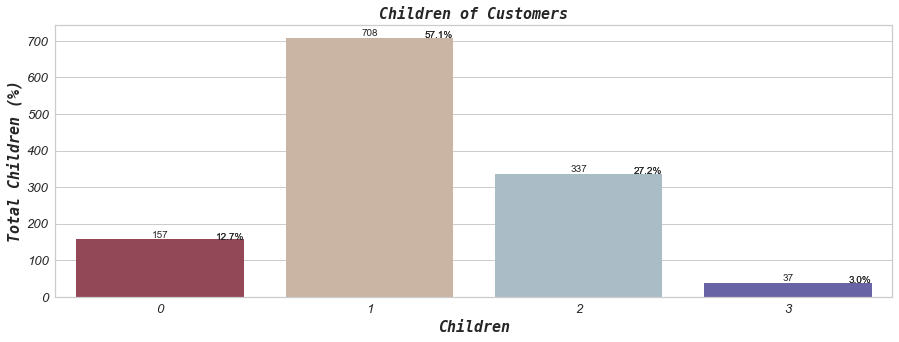

In [55]:
f, axs = plt.subplots(1,1,figsize=(15,5), sharex=True)
ax = sns.countplot(x='Children', data=df_o, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='right')
ab = sns.countplot(x="Children",data=df_o,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_o)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ab.annotate(percentage, (x, y),size=10,ha='right')
    plt.xticks(size=13,fontstyle='italic')
    plt.yticks(size=13,fontstyle='italic')
    plt.title('Children of Customers',size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Children',size=15, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Children (%)', size=15, fontstyle='italic',family='monospace', weight=900)
plt.show()

### **PRODUCTS** 

#### Wines

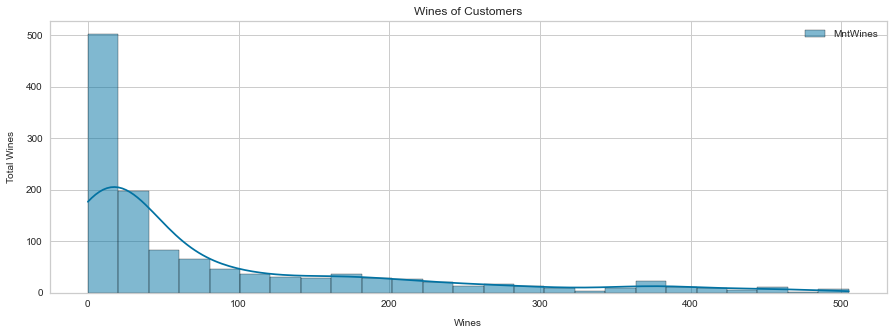

In [56]:
plt.subplots(1,1,figsize=(15,5), sharex=True)
ax = sns.histplot(data = df_o[['MntWines']], color = "midnightblue",kde=True)
ax.set(title = "Wines of Customers");
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Wines', fontsize=10, labelpad=10)
plt.ylabel('Total Wines', fontsize=10, labelpad=10);

#### Fruits

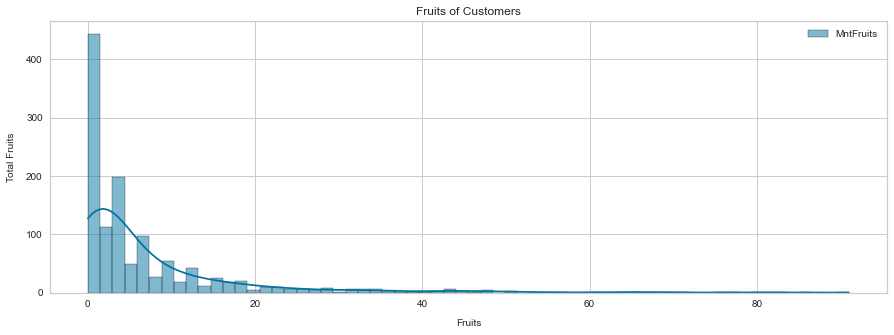

In [57]:
plt.subplots(1,1,figsize=(15,5), sharex=True)
ax = sns.histplot(data = df_o[['MntFruits']], color = "midnightblue",kde=True)
ax.set(title = "Fruits of Customers");
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Fruits', fontsize=10, labelpad=10)
plt.ylabel('Total Fruits', fontsize=10, labelpad=10);

#### Meat

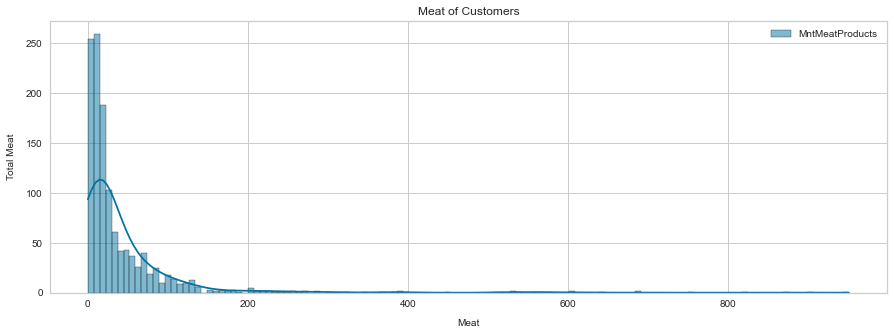

In [58]:
plt.subplots(1,1,figsize=(15,5), sharex=True)
ax = sns.histplot(data = df_o[['MntMeatProducts']], color = "midnightblue",kde=True)
ax.set(title = "Meat of Customers");
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Meat', fontsize=10, labelpad=10)
plt.ylabel('Total Meat', fontsize=10, labelpad=10);

#### Fish

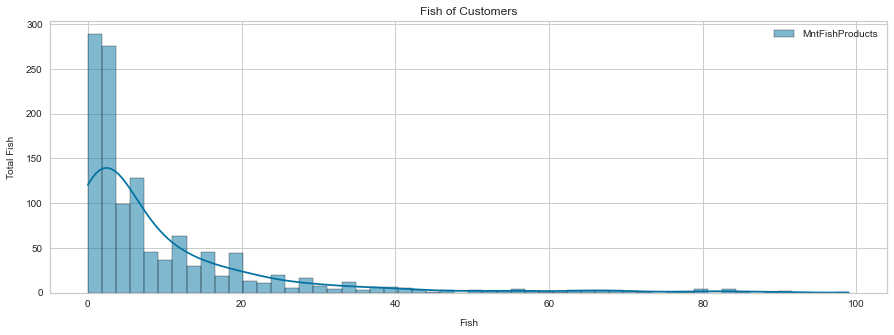

In [59]:
plt.subplots(1,1,figsize=(15,5), sharex=True)
ax = sns.histplot(data = df_o[['MntFishProducts']], color = "midnightblue",kde=True)
ax.set(title = "Fish of Customers");
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Fish', fontsize=10, labelpad=10)
plt.ylabel('Total Fish', fontsize=10, labelpad=10);

#### Sweet

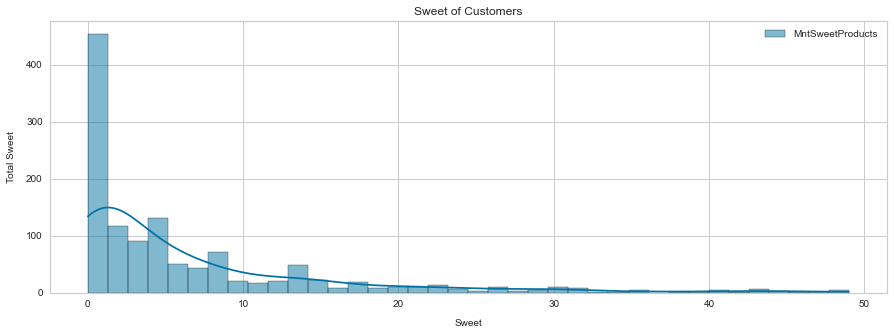

In [60]:
plt.subplots(1,1,figsize=(15,5), sharex=True)
ax = sns.histplot(data = df_o[['MntSweetProducts']], color = "midnightblue",kde=True)
ax.set(title = "Sweet of Customers");
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Sweet', fontsize=10, labelpad=10)
plt.ylabel('Total Sweet', fontsize=10, labelpad=10);

#### Gold

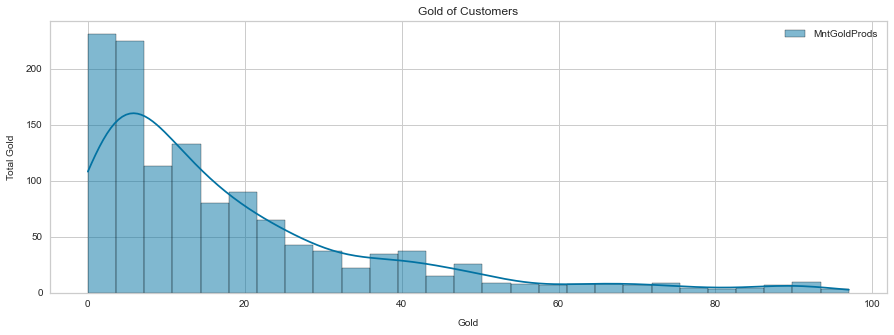

In [61]:
plt.subplots(1,1,figsize=(15,5), sharex=True)
ax = sns.histplot(data = df_o[['MntGoldProds']], color = "midnightblue",kde=True)
ax.set(title = "Gold of Customers");
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Gold', fontsize=10, labelpad=10)
plt.ylabel('Total Gold', fontsize=10, labelpad=10);

### **PROMOTION**

#### Num Deals Purchases

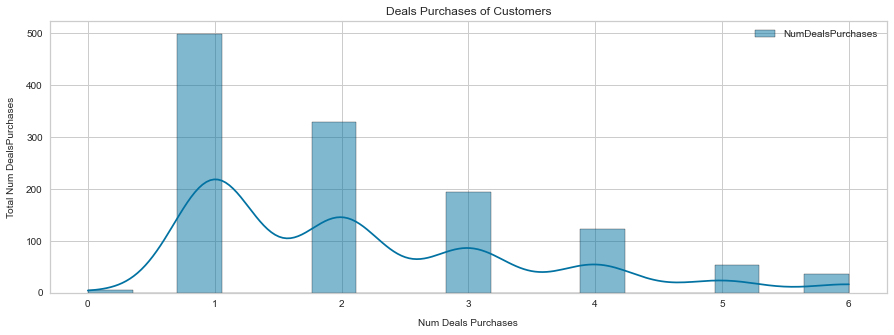

In [62]:
plt.subplots(1,1,figsize=(15,5), sharex=False)
ax = sns.histplot(data = df_o[['NumDealsPurchases']], color = "midnightblue",kde=True)
ax.set(title = "Deals Purchases of Customers");
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Num Deals Purchases', fontsize=10, labelpad=10)
plt.ylabel('Total Num DealsPurchases', fontsize=10, labelpad=10);

#### Num Web Purchases

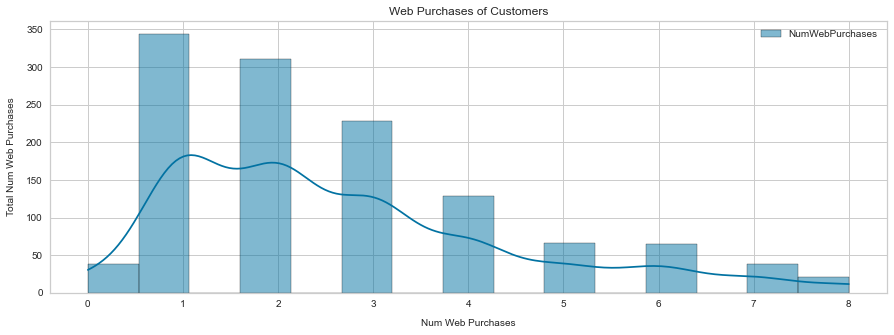

In [63]:
plt.subplots(1,1,figsize=(15,5), sharex=False)
ax = sns.histplot(data = df_o[['NumWebPurchases']], color = "midnightblue",kde=True)
ax.set(title = "Web Purchases of Customers");
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Num Web Purchases', fontsize=10, labelpad=10)
plt.ylabel('Total Num Web Purchases', fontsize=10, labelpad=10);

#### Num Catalog Purchases

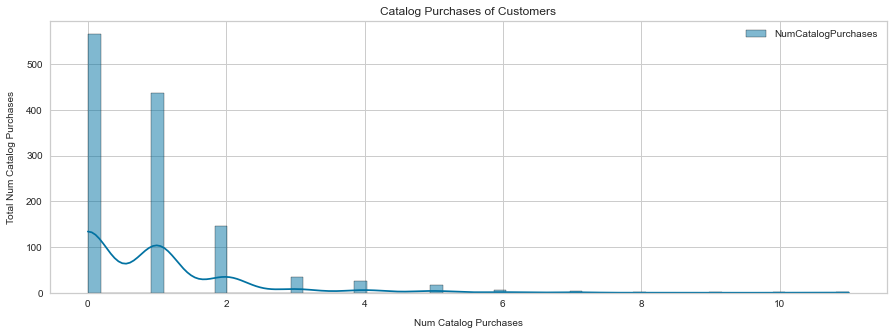

In [64]:
plt.subplots(1,1,figsize=(15,5), sharex=False)
ax = sns.histplot(data = df_o[['NumCatalogPurchases']], color = "midnightblue",kde=True)
ax.set(title = "Catalog Purchases of Customers");
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Num Catalog Purchases', fontsize=10, labelpad=10)
plt.ylabel('Total Num Catalog Purchases', fontsize=10, labelpad=10);

#### Num Store Purchases

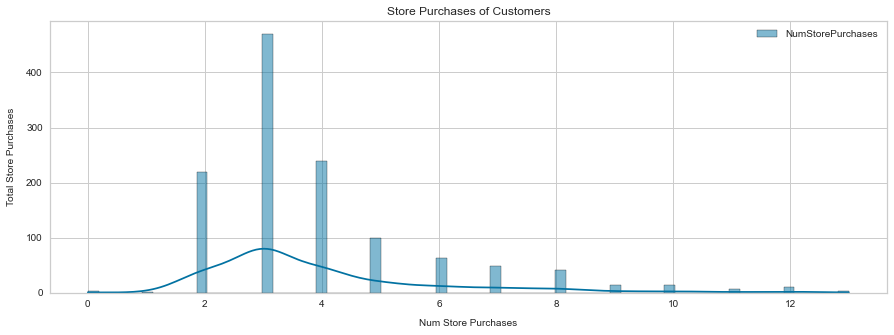

In [65]:
plt.subplots(1,1,figsize=(15,5), sharex=False)
ax = sns.histplot(data = df_o[['NumStorePurchases']], color = "midnightblue",kde=True)
ax.set(title = "Store Purchases of Customers");
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Num Store Purchases', fontsize=10, labelpad=10)
plt.ylabel('Total Store Purchases', fontsize=10, labelpad=10);

#### Num Web Visits Month

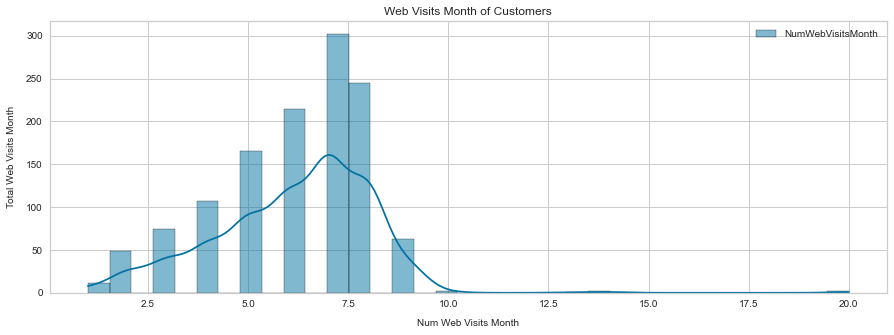

In [66]:
plt.subplots(1,1,figsize=(15,5), sharex=False)
ax = sns.histplot(data = df_o[['NumWebVisitsMonth']], color = "midnightblue",kde=True)
ax.set(title = "Web Visits Month of Customers");
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Num Web Visits Month', fontsize=10, labelpad=10)
plt.ylabel('Total Web Visits Month', fontsize=10, labelpad=10);

### **PLACE**

In [67]:
df.head()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children
0,Graduation,Single,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0
1,Graduation,Single,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,2
2,Graduation,Together,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,0
3,Graduation,Together,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,1
4,PhD,Married,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,1


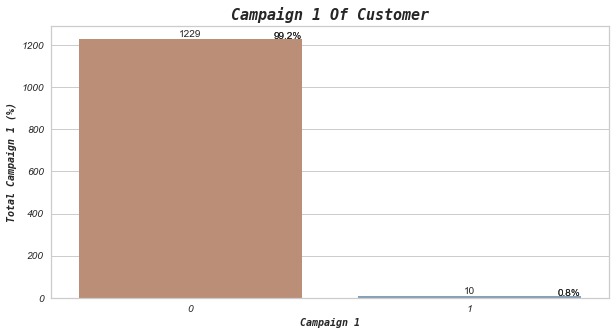

In [68]:
f, axs = plt.subplots(1,1,figsize=(10,5), sharex=True)
ax = sns.countplot(x='AcceptedCmp1', data=df_o, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='right')
ab = sns.countplot(x="AcceptedCmp1",data=df_o,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_o)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ab.annotate(percentage, (x, y),size=10,ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Campaign 1 Of Customer',size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Campaign 1',size=10, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Campaign 1 (%)', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

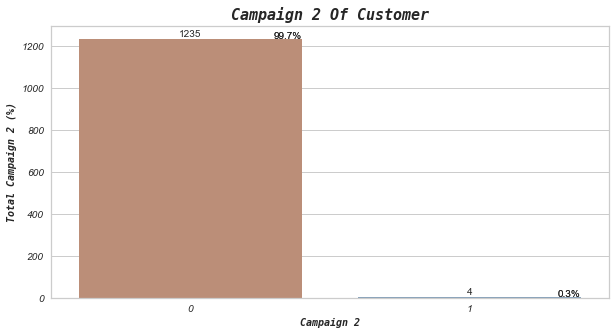

In [69]:
f, axs = plt.subplots(1,1,figsize=(10,5), sharex=True)
ax = sns.countplot(x='AcceptedCmp2', data=df_o, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='right')
ab = sns.countplot(x="AcceptedCmp2",data=df_o,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_o)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ab.annotate(percentage, (x, y),size=10,ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Campaign 2 Of Customer',size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Campaign 2',size=10, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Campaign 2 (%)', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

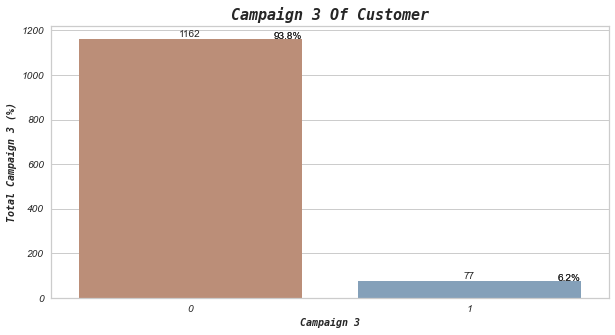

In [70]:
f, axs = plt.subplots(1,1,figsize=(10,5), sharex=True)
ax = sns.countplot(x='AcceptedCmp3', data=df_o, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='right')
ab = sns.countplot(x="AcceptedCmp3",data=df_o,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_o)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ab.annotate(percentage, (x, y),size=10,ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Campaign 3 Of Customer',size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Campaign 3',size=10, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Campaign 3 (%)', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

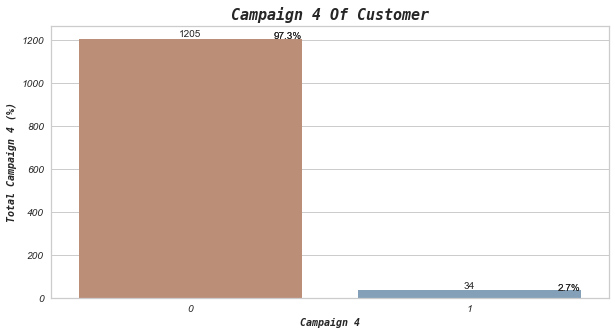

In [71]:
f, axs = plt.subplots(1,1,figsize=(10,5), sharex=True)
ax = sns.countplot(x='AcceptedCmp4', data=df_o, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='right')
ab = sns.countplot(x="AcceptedCmp4",data=df_o,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_o)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ab.annotate(percentage, (x, y),size=10,ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Campaign 4 Of Customer',size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Campaign 4',size=10, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Campaign 4 (%)', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

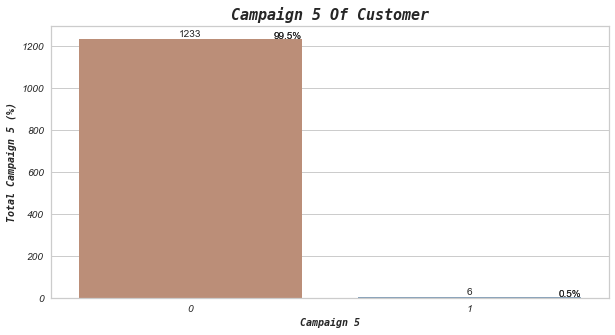

In [72]:
f, axs = plt.subplots(1,1,figsize=(10,5), sharex=True)
ax = sns.countplot(x='AcceptedCmp5', data=df_o, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='right')
ab = sns.countplot(x="AcceptedCmp5",data=df_o,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_o)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ab.annotate(percentage, (x, y),size=10,ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Campaign 5 Of Customer',size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Campaign 5',size=10, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Campaign 5 (%)', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

## **4. Clustering**

#### Feature Engineering

In [73]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [74]:
def edu_col (x):
    if x == 'Graduation':
        return 1
    elif x == '2n Cycle':
        return 2
    elif x == 'Basic':
        return 3
    elif x == 'Master':
        return 4
    else:
        return 5

In [75]:
df['Education'] = df['Education'].apply(edu_col)

In [76]:
def ms_col (x):
    if x == 'Single':
        return 1
    elif x == 'Married':
        return 2
    elif x == 'Divorced':
        return 3
    else:
        return 1

In [77]:
df['Marital_Status'] = df['Marital_Status'].apply(ms_col)

In [78]:
df_o = df.copy()

In [79]:
df_o['Total_Spendings'] = df_o['MntWines'] + df_o['MntFruits'] + df_o['MntMeatProducts'] + df_o['MntFishProducts'] + df_o['MntSweetProducts'] + df_o['MntGoldProds']

In [80]:
df_o.head()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_Spendings
0,1,1,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0,1617
1,1,1,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,2,27
2,1,1,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,0,776
3,1,1,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,1,53
4,5,2,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,1,422


#### Scaling Data

In [81]:
# Education = df_o['Education']
# Marital_Status = df_o['Marital_Status']
# AcceptedCmp3 = df_o['AcceptedCmp3']
# AcceptedCmp4 = df_o['AcceptedCmp4']
# AcceptedCmp5 = df_o['AcceptedCmp5']
# AcceptedCmp1 = df_o['AcceptedCmp1']
# AcceptedCmp2 = df_o['AcceptedCmp2']
# Complain = df_o['Complain']
# Response = df_o['Response']
# Children = df_o['Children']
# Age = df_o['Age']
# Total_Spending = df_o['MntWines'] + df_o['MntFruits'] + df_o['MntMeatProducts'] + df_o['MntFishProducts'] + df_o['MntSweetProducts'] + df_o['MntGoldProds']

In [82]:
df_o.head(5)

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Total_Spendings
0,1,1,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0,1617
1,1,1,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,2,27
2,1,1,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,0,776
3,1,1,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,1,53
4,5,2,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,1,422


In [83]:
# scaler = StandardScaler()
# df_o.drop(columns=['Education','Marital_Status','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Age'])
# df_o = pd.DataFrame(scaler.fit_transform(df_o), columns=df_o.columns)
# df_o['Education'] = Education
# df_o['Marital_Status'] = Marital_Status
# df_o['AcceptedCmp3'] = AcceptedCmp3
# df_o['AcceptedCmp4'] = AcceptedCmp4
# df_o['AcceptedCmp5'] = AcceptedCmp5
# df_o['AcceptedCmp1'] = AcceptedCmp1
# df_o['AcceptedCmp2'] = AcceptedCmp2
# df_o['Total_Spendings'] = Total_Spending
# df_o['Age'] = Age
# df_o['Children'] = Children
# df_o.head(5)

In [84]:
df_o.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Response'],inplace=True)

#### Menentukan Jumlah Cluster

In [85]:
inertia_list = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_o)
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

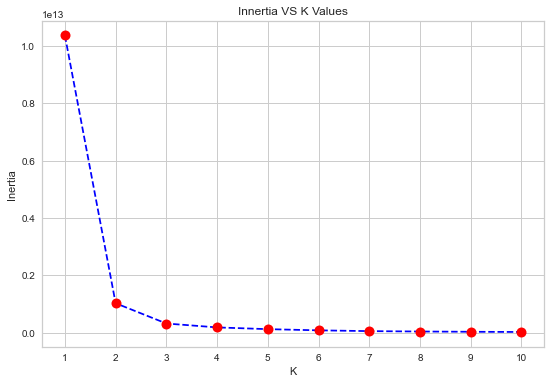

In [86]:
plt.figure(figsize=(9,6))
plt.plot(range(1,11),inertia_list, color = 'blue',
         linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Innertia VS K Values')
plt.xticks(range(1,11,1))
plt.xlabel('K')
plt.ylabel('Inertia')

- Insight :
  -  Berdasarkan perhitungan dari grafik elbow, cluster dibagi menjadi 3 kelompok.

In [87]:
km = KMeans(n_clusters=3).fit(df_o)
df_o['Category'] = km.labels_

In [88]:
df_o.head()

,Education,Marital_Status,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,Total_Spendings,Category
0,1,1,58138.0,3,8,10,4,7,0,0,0,0,0,0,65,0,1617,2
1,1,1,46344.0,2,1,1,2,5,0,0,0,0,0,0,68,2,27,0
2,1,1,71613.0,1,8,2,10,4,0,0,0,0,0,0,57,0,776,2
3,1,1,26646.0,2,2,0,4,6,0,0,0,0,0,0,38,1,53,0
4,5,2,58293.0,5,5,3,6,5,0,0,0,0,0,0,41,1,422,2


#### Pengelompokan Cluster

In [89]:
df_o[['Education','Age','Children','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
      'NumWebVisitsMonth','Total_Spendings','Category']].groupby('Category').mean().round()

,Education,Age,Children,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spendings
Category,,,,,,,,,
0,2.0,51.0,1.0,2.0,3.0,1.0,4.0,7.0,164.0
1,3.0,54.0,1.0,3.0,4.0,2.0,5.0,5.0,471.0
2,3.0,55.0,1.0,2.0,5.0,5.0,8.0,4.0,1075.0


In [90]:
df_o[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Income','Category']].groupby('Category').mean().round()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Income
Category,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,34561.0
1,0.0,0.0,0.0,0.0,0.0,0.0,666666.0
2,0.0,0.0,0.0,0.0,0.0,0.0,70299.0


In [91]:
df_o['Category'] = df_o['Category'].replace({0: 'Gold',
                                                             1: 'Silver',
                                                             2: 'Platinum'})

df_o['Category'] = df_o['Category']

In [92]:
df_o[['Education','Age','Children','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
      'NumWebVisitsMonth','Total_Spendings','Category']].groupby('Category').mean().round()

,Education,Age,Children,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spendings
Category,,,,,,,,,
Gold,2.0,51.0,1.0,2.0,3.0,1.0,4.0,7.0,164.0
Platinum,3.0,55.0,1.0,2.0,5.0,5.0,8.0,4.0,1075.0
Silver,3.0,54.0,1.0,3.0,4.0,2.0,5.0,5.0,471.0


In [93]:
df_o[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Income','Category']].groupby('Category').mean().round()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Income
Category,,,,,,,
Gold,0.0,0.0,0.0,0.0,0.0,0.0,34561.0
Platinum,0.0,0.0,0.0,0.0,0.0,0.0,70299.0
Silver,0.0,0.0,0.0,0.0,0.0,0.0,666666.0


In [94]:
df_o.loc[(df_o['Age'] >= 13) & (df_o['Age'] <= 19), 'AgeGroup'] = 'Teen'
df_o.loc[(df_o['Age'] >= 20) & (df_o['Age']<= 39), 'AgeGroup'] = 'Adult'
df_o.loc[(df_o['Age'] >= 40) & (df_o['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
df_o.loc[(df_o['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

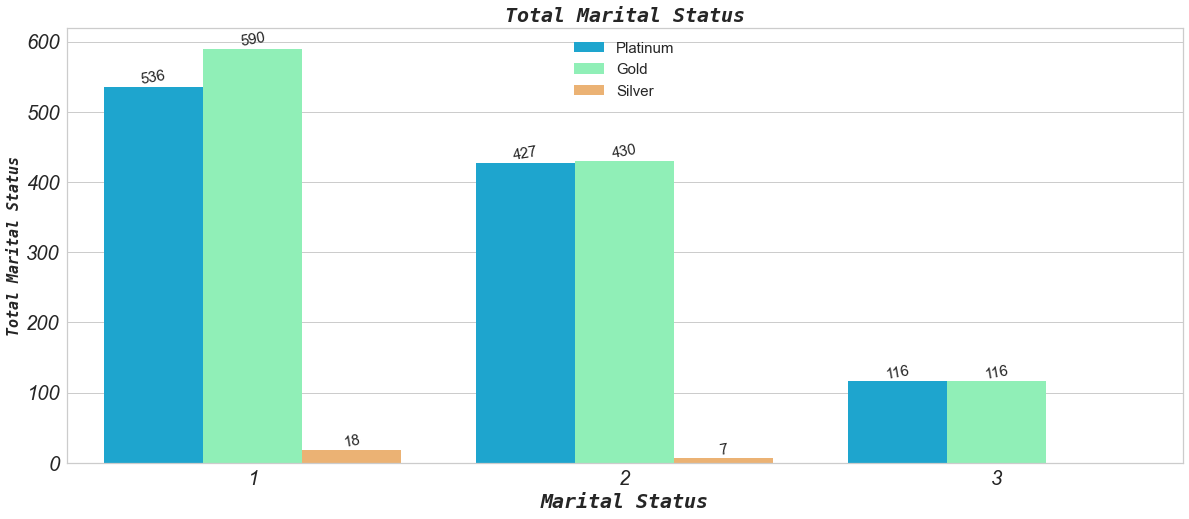

In [95]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Marital_Status', data=df_o, hue="Category", palette = 'rainbow')
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Total Marital Status',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Marital Status', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Marital Status', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=15,rotation=10, horizontalalignment='left')
plt.legend(fontsize=15)
plt.show()

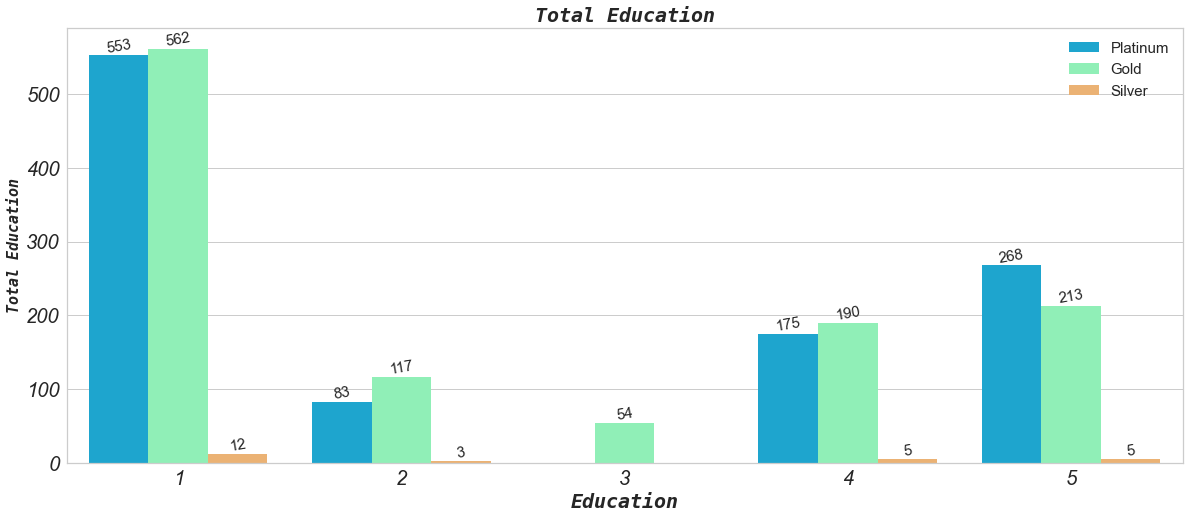

In [96]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Education', data=df_o, hue="Category", palette = 'rainbow')
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Total Education',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Education', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Education', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=15,rotation=10, horizontalalignment='left')
plt.legend(fontsize=15)
plt.show()

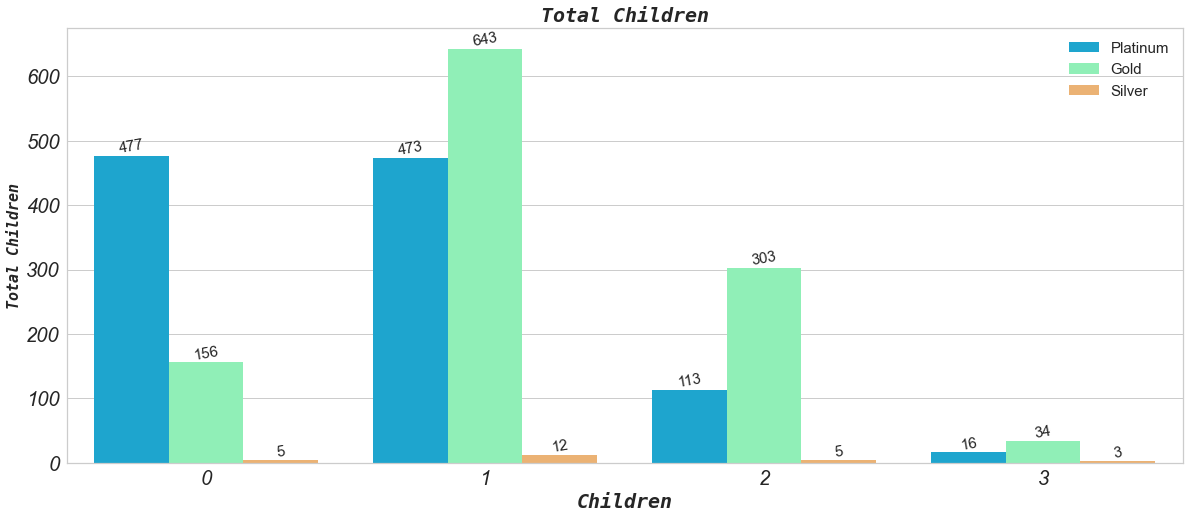

In [97]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Children', data=df_o, hue="Category", palette = 'rainbow')
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Total Children',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Children', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Children', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=15,rotation=10, horizontalalignment='left')
plt.legend(fontsize=15)
plt.show()

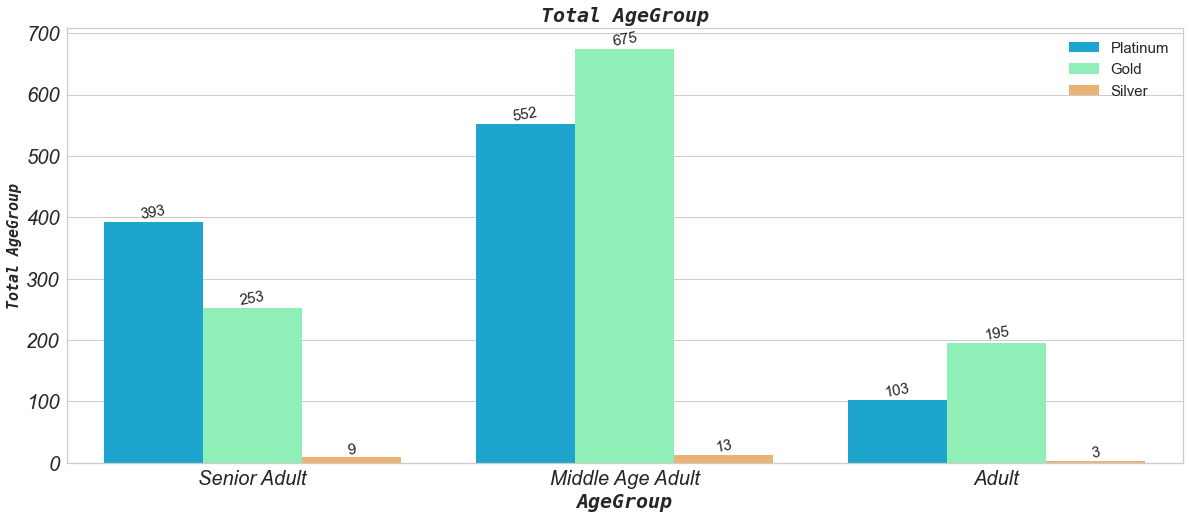

In [98]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='AgeGroup', data=df_o, hue="Category", palette = 'rainbow')
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Total AgeGroup',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('AgeGroup', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total AgeGroup', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=15,rotation=10, horizontalalignment='left')
plt.legend(fontsize=15)
plt.show()

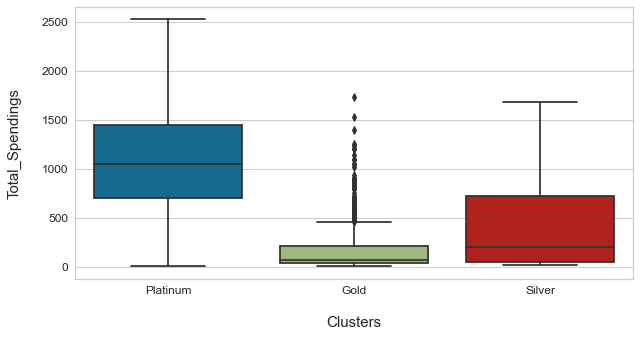

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_o, x='Category', y = 'Total_Spendings');
plt.xticks(size=12);
plt.yticks(size=12);
plt.xlabel('Clusters', fontsize=15, labelpad=20)
plt.ylabel('Total_Spendings', fontsize=15, labelpad=20);

In [100]:
import plotly.express as px

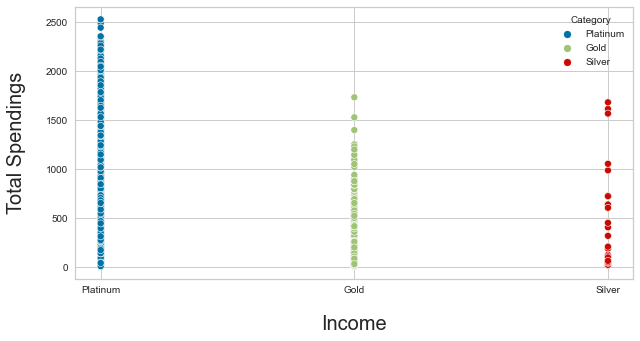

In [101]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_o, x='Category', y='Total_Spendings', hue='Category');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

In [102]:
df_o[['Education','Age','Children','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
      'NumWebVisitsMonth','Total_Spendings','Category']].groupby('Category').mean().round()


,Education,Age,Children,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spendings
Category,,,,,,,,,
Gold,2.0,51.0,1.0,2.0,3.0,1.0,4.0,7.0,164.0
Platinum,3.0,55.0,1.0,2.0,5.0,5.0,8.0,4.0,1075.0
Silver,3.0,54.0,1.0,3.0,4.0,2.0,5.0,5.0,471.0


In [103]:
df_o[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Income','Category']].groupby('Category').mean().round(1)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Income
Category,,,,,,,
Gold,0.0,0.0,0.1,0.0,0.0,0.0,34560.8
Platinum,0.1,0.0,0.1,0.1,0.1,0.0,70298.6
Silver,0.1,0.0,0.0,0.1,0.0,0.0,666666.0


## **Kesimpulan** :

- Clustering Gold :
  - Education : Basic
  - Age : 54
  - Children : 1
  - NumDealsPurchases : 2
  - NumWebPurchases : 5
  - NumCatalogPurchases : 5
  - NumStorePurchases : 8
  - NumWebVisitsMonth : 4
  - AcceptedCmp1 : 1
  - AcceptedCmp2 : 0
  - AcceptedCmp3 : 1
  - AcceptedCmp4 : 1
  - AcceptedCmp5 : 1
  - Income : 70.298
  - Total_Spendings : 1.075
  - Percentage 0,015%
  - Customer ini memiliki pendapatan yang paling tinggi, pembelian dengan quantity terbanyak.

- Clustering Silver :
  - Education : 2n Cycle
  - Age : 51
  - Children : 1
  - NumDealsPurchases : 2
  - NumWebPurchases : 3
  - NumCatalogPurchases : 1
  - NumStorePurchases : 4
  - NumWebVisitsMonth : 7
  - AcceptedCmp1 : 0
  - AcceptedCmp2 : 0
  - AcceptedCmp3 : 1
  - AcceptedCmp4 : 0
  - AcceptedCmp5 : 0
  - Income : 34.561
  - Total_Spendings : 164
  - Percentage : 0,004%
  - Customer ini memiliki pendapatan yang sedang, pembelian dengan quantity sedang.

- Clustering Silver :
  - Education : Basic
  - Age : 54
  - Children : 1
  - NumDealsPurchases : 3
  - NumWebPurchases : 4
  - NumCatalogPurchases : 2
  - NumStorePurchases : 5
  - NumWebVisitsMonth : 5
  - AcceptedCmp1 : 1
  - AcceptedCmp2 : 0
  - AcceptedCmp3 : 0
  - AcceptedCmp4 : 1
  - AcceptedCmp5 : 0
  - Income : 666.667
  - Total_Spendings : 471
  - Percentage : 0,70%
  - Customer ini memiliki pendapatan yang paling kecil, pembelian dengan quantity terkecil.

## **Saran** :

- Tim marketing perlu menjaga hubungan baik pada customer yang masuk clustering "Gold", hal ini di karenakan customer memiliki pendapatan yang tinggi dan total pengeluaran untuk belanja yang tinggi. Ini bisa menjadi peluang untuk perusahaan dan tim marketing melakukan pemasaran sedangkan untuk customer yang masuk dalam clustering 'Silver' dan 'Platinum' tidak dijadikan fokus untuk pemasaran/target hal ini dikarenakan total pendapatan dan total pengeluaran uangnya untuk belanja lebih sedikit, jika hal ini menjadi fokus perusahaan maka akan membesarkan beban pada laporan keuangannya saja.